# import the library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import dataset

In [2]:
df = pd.read_csv('./dataset/CAR DETAILS FROM CAR DEKHO.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


# analyse dataset

In [3]:
df.shape

(4340, 8)

# check whether we can compute the company or not?

In [4]:
df['name'].unique()

array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
       'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], shape=(1491,), dtype=object)

In [5]:
df["company"] = df['name'].str.split(" ").str[0]
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,company
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


In [6]:
df["company"].value_counts()

company
Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Mitsubishi          6
Jaguar              6
Land                5
Volvo               4
Ambassador          4
Jeep                3
OpelCorsa           2
MG                  2
Force               1
Daewoo              1
Isuzu               1
Kia                 1
Name: count, dtype: int64

# relation with km dirven

In [7]:
df['km_driven'].describe()

count      4340.000000
mean      66215.777419
std       46644.102194
min           1.000000
25%       35000.000000
50%       60000.000000
75%       90000.000000
max      806599.000000
Name: km_driven, dtype: float64

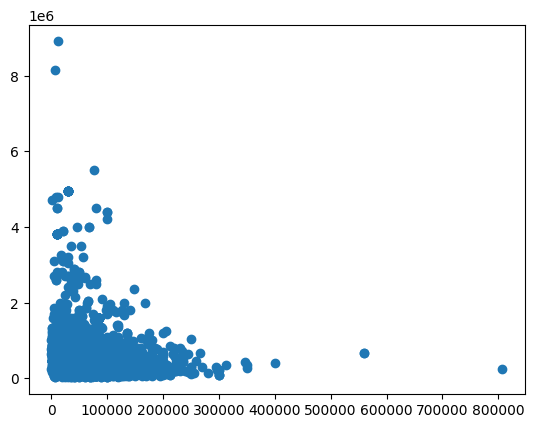

In [8]:
plt.scatter(df['km_driven'],df['selling_price'])
plt.show()

from the graph we can say that car driven more that 3500000 might be an outlier

In [9]:
df[df['km_driven'] > 350000]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,company
525,Maruti SX4 S Cross DDiS 320 Delta,2016,665000,560000,Diesel,Dealer,Manual,First Owner,Maruti
1243,Maruti Swift VXI BSIII,2009,250000,806599,Petrol,Dealer,Manual,First Owner,Maruti
3679,Toyota Innova 2.5 G (Diesel) 7 Seater BS IV,2006,400000,400000,Diesel,Individual,Manual,Third Owner,Toyota
4184,Maruti SX4 S Cross DDiS 320 Delta,2016,665000,560000,Diesel,Dealer,Manual,First Owner,Maruti


remove this 4 entries

In [10]:
df.drop(df[df['km_driven'] > 350000].index, inplace=True)

In [11]:
df[df['km_driven'] < 1000]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,company
1312,Mahindra Quanto C6,2014,250000,1,Diesel,Individual,Manual,Second Owner,Mahindra
1714,Ford Freestyle Titanium Diesel,2020,784000,101,Diesel,Dealer,Manual,Test Drive Car,Ford
1715,Ford Figo Titanium,2020,635000,101,Petrol,Dealer,Manual,Test Drive Car,Ford
1716,Ford Ecosport 1.5 Diesel Titanium,2020,1000000,101,Diesel,Dealer,Manual,Test Drive Car,Ford


drop this 4 rows

In [12]:
df.drop(df[df['km_driven'] < 1000].index, inplace=True)

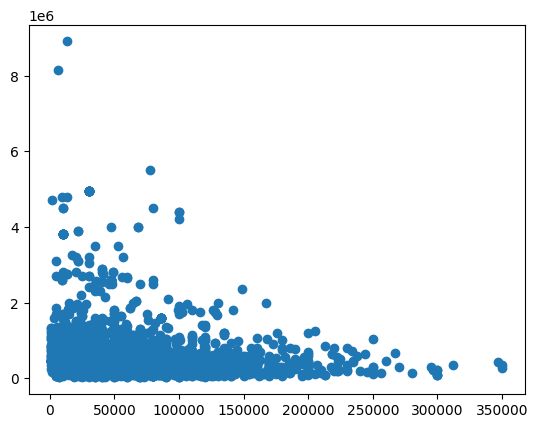

In [13]:
plt.scatter(df['km_driven'],df['selling_price'])
plt.show()

In [14]:
df['km_driven'].describe()

count      4332.000000
mean      65800.916667
std       43710.318140
min        1000.000000
25%       35000.000000
50%       60000.000000
75%       90000.000000
max      350000.000000
Name: km_driven, dtype: float64

# Drop the unnessary columns

In [15]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,company
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


list of column to remove
- name
- transmission
- seller type
- owner

In [16]:
df = df.drop(['name', 'transmission', 'seller_type', 'owner'], axis=1)
df.head()

,year,selling_price,km_driven,fuel,company
0,2007,60000,70000,Petrol,Maruti
1,2007,135000,50000,Petrol,Maruti
2,2012,600000,100000,Diesel,Hyundai
3,2017,250000,46000,Petrol,Datsun
4,2014,450000,141000,Diesel,Honda


# understand fule relation

In [17]:
df['fuel'].describe()

count       4332
unique         5
top       Diesel
freq        2147
Name: fuel, dtype: object

In [18]:
df['fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [19]:
df['fuel'].value_counts()

fuel
Diesel      2147
Petrol      2121
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64

remove electric 

In [20]:
df.drop(df[df['fuel'] == 'Electric'].index, inplace=True)
df['fuel'].value_counts()

fuel
Diesel    2147
Petrol    2121
CNG         40
LPG         23
Name: count, dtype: int64

# understand year

In [21]:
df['year'].describe()

count    4331.000000
mean     2013.088663
std         4.212100
min      1992.000000
25%      2011.000000
50%      2014.000000
75%      2016.000000
max      2020.000000
Name: year, dtype: float64

In [22]:
df['year'].unique()

array([2007, 2012, 2017, 2014, 2016, 2015, 2018, 2019, 2013, 2011, 2010,
       2009, 2006, 1996, 2005, 2008, 2004, 1998, 2003, 2002, 2020, 2000,
       1999, 2001, 1995, 1997, 1992])

In [23]:
 df['year'].value_counts()

year
2017    466
2015    421
2012    415
2013    386
2018    366
2014    366
2016    355
2011    271
2010    234
2019    195
2009    192
2008    145
2007    134
2006    108
2005     85
2020     45
2004     42
2003     23
2002     21
2001     20
1998     12
2000     12
1999     10
1997      3
1996      2
1995      1
1992      1
Name: count, dtype: int64

remove less than 3

In [24]:
df.drop(df[df['year'] <= 1997].index, inplace=True)
df['year'].value_counts()

year
2017    466
2015    421
2012    415
2013    386
2018    366
2014    366
2016    355
2011    271
2010    234
2019    195
2009    192
2008    145
2007    134
2006    108
2005     85
2020     45
2004     42
2003     23
2002     21
2001     20
1998     12
2000     12
1999     10
Name: count, dtype: int64

In [25]:
df['year'].corr(df['selling_price'])

np.float64(0.4153599146250809)

# Model

In [26]:
df.head()

,year,selling_price,km_driven,fuel,company
0,2007,60000,70000,Petrol,Maruti
1,2007,135000,50000,Petrol,Maruti
2,2012,600000,100000,Diesel,Hyundai
3,2017,250000,46000,Petrol,Datsun
4,2014,450000,141000,Diesel,Honda


In [27]:
df['year'].corr(df['km_driven'])

np.float64(-0.4482503317364134)

In [28]:
x = df.drop(columns=['selling_price'])
y = df['selling_price']

x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4324 entries, 0 to 4339
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   year       4324 non-null   int64 
 1   km_driven  4324 non-null   int64 
 2   fuel       4324 non-null   object
 3   company    4324 non-null   object
dtypes: int64(2), object(2)
memory usage: 168.9+ KB


### train test split

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### encoder

In [30]:
from sklearn.preprocessing import OneHotEncoder

In [31]:
encoder = OneHotEncoder(sparse_output=False)

In [32]:
encoder.fit(x[['fuel', 'company']])

,categories,'auto'
,drop,None
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [33]:
encoder.categories_

[array(['CNG', 'Diesel', 'LPG', 'Petrol'], dtype=object),
 array(['Ambassador', 'Audi', 'BMW', 'Chevrolet', 'Daewoo', 'Datsun',
        'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar',
        'Jeep', 'Kia', 'Land', 'MG', 'Mahindra', 'Maruti', 'Mercedes-Benz',
        'Mitsubishi', 'Nissan', 'OpelCorsa', 'Renault', 'Skoda', 'Tata',
        'Toyota', 'Volkswagen', 'Volvo'], dtype=object)]

### column transform

In [34]:
from sklearn.compose import make_column_transformer

In [35]:
column_trans = make_column_transformer((OneHotEncoder(categories=encoder.categories_),['fuel', 'company']),remainder='passthrough')

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

### Liner regression


In [37]:
reg = LinearRegression()

In [38]:
pipline = make_pipeline(column_trans, reg)

In [39]:
pipline.fit(x_train,y_train)

,steps,"[('columntransformer', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [40]:
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
score = []
for i in range(1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    lr = LinearRegression()
    pip = make_pipeline(column_trans, lr)
    pip.fit(x_train, y_train)
    y_pred = pip.predict(x_test)
    score.append(r2_score(y_test, y_pred))
    

In [41]:
np.argmax(score)

np.int64(801)

In [42]:
score[801]

0.6905876074700856

# random forest

In [43]:
from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    max_depth=None,
)

In [44]:
pipeline_random_forest = make_pipeline(column_trans,random_forest_model)

In [50]:
pipeline_random_forest.fit(x_train, y_train)

,steps,"[('columntransformer', ...), ('randomforestregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [46]:
y_pred = pipeline_random_forest.predict(x_test)

In [47]:
r2_score(y_test,y_pred)

0.808852729820306

# Decision tree

In [48]:
from sklearn.tree import DecisionTreeRegressor

In [49]:
decision_tree_model = DecisionTreeRegressor(
    max_depth=None,        # optional: control tree depth
    min_samples_split=10,  # optional: control splitting
    random_state=42
)

In [54]:
pipeline_decision_tree = make_pipeline(column_trans,decision_tree_model)

In [55]:
pipeline_decision_tree.fit(x_train, y_train)

,steps,"[('columntransformer', ...), ('decisiontreeregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [56]:
y_pred = pipeline_decision_tree.predict(x_test)

In [57]:
r2_score(y_test,y_pred)

0.6911865446361023

# KNN regessor

In [58]:
from sklearn.neighbors import KNeighborsRegressor

In [59]:
knn_model = KNeighborsRegressor(
        n_neighbors=5,      # default k
        weights='distance', # optional: closer points have more influence
        p=2                 # p=2 → Euclidean distance
    )

In [60]:
pipeline_knn = make_pipeline(column_trans,knn_model)

In [61]:
pipeline_knn.fit(x_train, y_train)

,steps,"[('columntransformer', ...), ('kneighborsregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [62]:
y_pred = pipeline_knn.predict(x_test)

In [63]:
r2_score(y_test,y_pred)

0.33247777411885804

# hyperparameter tunning for random forest

In [64]:
from sklearn.model_selection import GridSearchCV

In [67]:
parms_grid = {
    'n_estimators':[400, 300, 200, 100],
    'max_depth':[100, 50, 30, None],
    'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson']
}

In [68]:
grid = GridSearchCV(
    estimator=random_forest_model,
    param_grid=parms_grid,
    cv=5,                  # 5-fold cross-validation
    scoring="neg_mean_squared_error",
    n_jobs=-1,             # use all CPU cores
    verbose=1
)

In [69]:
grib_pipeline = make_pipeline(column_trans, grid)

In [70]:
grib_pipeline.fit(x_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


,steps,"[('columntransformer', ...), ('gridsearchcv', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [71]:
y_pred = grib_pipeline.predict(x_test)

In [72]:
r2_score(y_test,y_pred)

0.8102168761937873

# dump this model

In [75]:
import pickle
with open("pkl/car_price_model_final.pkl", "wb") as f:
    pickle.dump(grib_pipeline, f)

### Check for best params

In [51]:
import pickle

# Load model
model = pickle.load(open("pkl/car_price_model_final.pkl", "rb"))

In [52]:
best_params = model.named_steps["gridsearchcv"].best_params_
print(best_params)

{'criterion': 'friedman_mse', 'max_depth': 100, 'n_estimators': 400}
